# Basic initial cleaning

In [275]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import emoji
import scipy.stats as stats
import nltk
from nltk import pos_tag, word_tokenize
from nltk.util import ngrams
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from gensim import corpora

In [3]:
#Importing data
df = pd.read_csv("isarcasm2022.csv")
df.head()

,Unnamed: 0,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0
1,1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0
2,2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0
3,3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0
4,4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Remove columns that are no longer needed
df = df.drop(columns=['Unnamed: 0'])
df.head()

,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(3468, 9)

In [9]:
#Check for null values
df.isnull().sum()

tweet                     1
sarcastic                 0
rephrase               2601
sarcasm                2601
irony                  2601
satire                 2601
understatement         2601
overstatement          2601
rhetorical_question    2601
dtype: int64

In [10]:
#Remove rows where tweet column is empty
df.dropna(subset=['tweet'], inplace=True)

In [11]:
#Check number of words in the tweets
data_len = df['tweet'].apply(lambda x: len(x.split(' '))).sum()
print(f'{data_len} words')

65266 words


In [14]:
#Remove rows containing sarcasm type for now
df = df.drop(columns=['sarcasm', 'irony', 'satire', 'overstatement', 'understatement', 'rhetorical_question'])
df.head()

,tweet,sarcastic,rephrase
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring..."
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall..."
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to..."
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...


In [17]:
#Check the unique values in label column
df.sarcastic.unique()

array([1, 0], dtype=int64)

In [19]:
#Check balance of dataset
df['sarcastic'].value_counts()

0    2600
1     867
Name: sarcastic, dtype: int64

# Extraction Statistical Features - Pragmatic Features

The following work aims to extract features from the tweets which may be relevant to determine the presence of sarcasm in text. Features in the text which will be extracted include the frequencies of structural features of the text such as capitalized words, capitalisation within words, user mentions, hashtags, markers of laughter, punctuation, emoji frequency, and linguistic features including the presence of vocabulary classed as an intensifiers, interjectors, negators or affirmators. These features are each postulated to provide indicators of pragmatics within the text and thus may be able to provide insight into how sarcasm is detected within text.

In [22]:
#Capitalised words

#Define function to count capitalised words
def count_capital_words(text):
    words = text.split()
    capital_words_count = sum(1 for word in words if word[0].isupper())
    return capital_words_count

#Apply to tweets column
df['capitalised_words'] = df['tweet'].apply(count_capital_words)
df.head()

,tweet,sarcastic,rephrase,capitalised_words
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",2
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,3
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",4
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",2
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,5


In [23]:
#User mentions

#Define function to count user mentions
def count_user_mentions(text):
    words = text.split()
    user_mentions_count = sum(1 for word in words if word.startswith('@'))
    return user_mentions_count

#Apply to tweets column
df['user_mentions'] = df['tweet'].apply(count_user_mentions)
df.head()

,tweet,sarcastic,rephrase,capitalised_words,user_mentions
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",2,0
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,3,0
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",4,1
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",2,0
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,5,3


In [24]:
#Hashtags

#Define function to count hashtags
def count_hashtags(text):
    words = text.split()
    hashtag_count = sum(1 for word in words if word.startswith('#'))
    return hashtag_count

#Apply to tweets column
df['hashtags'] = df['tweet'].apply(count_hashtags)
df.head()

,tweet,sarcastic,rephrase,capitalised_words,user_mentions,hashtags
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",2,0,0
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,3,0,0
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",4,1,0
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",2,0,0
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,5,3,0


In [27]:
#Laughter markers

#Define the function to count laughter occurrences
def count_laughter(text):
    words = text.split()
    laugh_count = sum(1 for word in words if word.startswith("haha") or re.match('l(o)+l$', word, re.IGNORECASE))
    return laugh_count

#Apply to tweets column
df['laughter'] = df['tweet'].apply(count_laughter)
df.head()

,tweet,sarcastic,rephrase,capitalised_words,user_mentions,hashtags,laughter
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",2,0,0,0
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,3,0,0,0
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",4,1,0,0
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",2,0,0,0
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,5,3,0,0


In [29]:
#Punctuation

#Make a list of potentially relevant punctuation 
#Commas, quotation marks single colons etc as these are unlikely to be relevant for the problem set
#Only what may be relevant is added to the list
punctuation = ["?", "!", "..."]

#Define the function to count relevant punctuation
def count_punctuation(text, punctuation):
    words = text.split()
    punctuation_count = sum(text.count(p) for p in punctuation)
    return punctuation_count
    
#Apply to tweets column
df['punctuation'] = df['tweet'].apply(lambda x: count_punctuation(x, punctuation))
df.head()

,tweet,sarcastic,rephrase,capitalised_words,user_mentions,hashtags,laughter,punctuation
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",2,0,0,0,0
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,3,0,0,0,0
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",4,1,0,0,2
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",2,0,0,0,0
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,5,3,0,0,0


In [50]:
#Affermatives

#Make list of strong affermatives
strong_affermatives = ["yes", "yeah", "always", "all", "any", "every", "everybody", "everywhere", "ever"]

#Define the function to count strong affermatives
def count_affermatives(text, strong_affermatives):
    words = text.split()
    affermatives_count = sum(text.count(n) for n in strong_affermatives)
    return affermatives_count
    
#Apply to tweets column
df['affermatives'] = df['tweet'].apply(lambda x: count_affermatives(x, strong_affermatives))
df.head()

,tweet,sarcastic,rephrase,capitalised_words,user_mentions,hashtags,laughter,punctuation,negations,intensifiers,interjections,affermatives
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",2,0,0,0,0,0,0,0,0
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,3,0,0,0,0,0,0,2,2
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",4,1,0,0,2,0,0,0,1
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",2,0,0,0,0,2,0,0,0
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,5,3,0,0,0,2,1,0,0


In [47]:
#Negations

#Make list of strong negations
strong_negations = ["no", "not", "never", "none", "n't", "nothing", "neither", "nobody", "nowhere"]

#Define the function to count strong negations
def count_negation(text, strong_negations):
    words = text.split()
    negations_count = sum(text.count(n) for n in strong_negations)
    return negations_count
    
#Apply to tweets column
df['negations'] = df['tweet'].apply(lambda x: count_negation(x, strong_negations))
df.head()

,tweet,sarcastic,rephrase,capitalised_words,user_mentions,hashtags,laughter,punctuation,negations
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",2,0,0,0,0,0
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,3,0,0,0,0,0
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",4,1,0,0,2,0
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",2,0,0,0,0,2
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,5,3,0,0,0,2


In [48]:
#Intensifiers

#Make a list of intensifiers
intensifiers = ["amazingly", "astoundingly", "awful", "bare", "bloody", "crazy", "dreadfully",
                "colossally", "especially", "exceptionally", "excessively", "extremely",
                "extraordinarily", "fantastically", "frightfully", "fucking", "fully", "hella",
                "holy", "incredibly", "insanely", "literally", "mightily", "moderately", "most",
                "outrageously", "phenomenally", "precious", "quite", "radically", "rather",
                "really", "remarkably", "right", "sick", "strikingly", "super", "supremely",
                "surprisingly", "terribly", "terrifically", "too", "totally", "uncommonly",
                "unusually", "veritable", "very", "wicked"]

#Define the function to count intensifiers
def count_intensifiers(text, intensifiers):
    words = text.split()
    intensifier_count = sum(text.count(n) for n in intensifiers)
    return intensifier_count
    
#Apply to tweets column
df['intensifiers'] = df['tweet'].apply(lambda x: count_intensifiers(x, intensifiers))
df.head()

,tweet,sarcastic,rephrase,capitalised_words,user_mentions,hashtags,laughter,punctuation,negations,intensifiers
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",2,0,0,0,0,0,0
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,3,0,0,0,0,0,0
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",4,1,0,0,2,0,0
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",2,0,0,0,0,2,0
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,5,3,0,0,0,2,1


In [49]:
#Interjections

#Make a list of interjections
interjections = ["oh", "hey", "wow", "aha", "aham", "aw", "bam", "blah", "bingo", "boo", "bravo",
                 "cheers", "congratulations", "congrats", "duh", "eh", "gee", "gosh", "hey", "hmm",
                 "huh", "hurray", "oh", "oh dear", "oh my", "oh well", "oops", "ouch", "ow", "phew",
                 "shh", "uh", "uh-huh", "mhm", "ugh", "well", "wow", "woah", "yeah", "yep", "yikes", "yo"]

#Define the function to count interjections
def count_interjections(text, interjections):
    words = text.split()
    interjection_count = sum(text.count(n) for n in interjections)
    return interjection_count
    
#Apply to tweets column
df['interjections'] = df['tweet'].apply(lambda x: count_interjections(x, interjections))
df.head()

,tweet,sarcastic,rephrase,capitalised_words,user_mentions,hashtags,laughter,punctuation,negations,intensifiers,interjections
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",2,0,0,0,0,0,0,0
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,3,0,0,0,0,0,0,2
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",4,1,0,0,2,0,0,0
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",2,0,0,0,0,2,0,0
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,5,3,0,0,0,2,1,0


In [56]:
#Emojis

#Define the function to count emojis
def count_emojis(text):
    text_without_emojis = emoji.demojize(text)
    emojis_count = text.count(":")
    return emojis_count

#Apply to tweets column
df['emoji'] = df['tweet'].apply(count_emojis)
df.head()

,tweet,sarcastic,rephrase,capitalised_words,user_mentions,hashtags,laughter,punctuation,negations,intensifiers,interjections,affermatives,midword_capitalisation,emoji
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",2,0,0,0,0,0,0,0,0,0,0
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,3,0,0,0,0,0,0,2,2,0,0
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",4,1,0,0,2,0,0,0,1,1,0
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",2,0,0,0,0,2,0,0,0,0,0
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,5,3,0,0,0,2,1,0,0,1,0


In [55]:
#Capitalisations in the middle of words

#Define the function to count capitalisation in the middle of words
def count_midword_capitalisation(text):
    words = text.split()
    midword_capitalisation_count = sum(1 for word in words if any(char.isupper() for char in word[1:]))
    return midword_capitalisation_count

#Apply to tweets column
df['midword_capitalisation'] = df['tweet'].apply(count_midword_capitalisation)
df.head()

,tweet,sarcastic,rephrase,capitalised_words,user_mentions,hashtags,laughter,punctuation,negations,intensifiers,interjections,affermatives,midword_capitalisation
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",2,0,0,0,0,0,0,0,0,0
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,3,0,0,0,0,0,0,2,2,0
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",4,1,0,0,2,0,0,0,1,1
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",2,0,0,0,0,2,0,0,0,0
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,5,3,0,0,0,2,1,0,0,1


In [58]:
#Length of tweets
df['tweet_length'] = df['tweet'].apply(lambda x: len(x.split()))
df.head()

,tweet,sarcastic,rephrase,capitalised_words,user_mentions,hashtags,laughter,punctuation,negations,intensifiers,interjections,affermatives,midword_capitalisation,emoji,tweet_length
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",2,0,0,0,0,0,0,0,0,0,0,11
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,3,0,0,0,0,0,0,2,2,0,0,26
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",4,1,0,0,2,0,0,0,1,1,0,36
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",2,0,0,0,0,2,0,0,0,0,0,17
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,5,3,0,0,0,2,1,0,0,1,0,29


# Statistical analysis of pragmatic features

Following the extraction of a wide range of features from the tweets in the dataset, work will be carried out to further understand which of these features have statistically significant differences between sarcastic and non-sarcastic tweets. 

In [62]:
#Decide if I should do parametric/non-parametric test
#Check if data is normally distributed via Shapiro Wilk test

#Create subsets
sarcastic_tweets = df[df['sarcastic'] == 1]
nonsarcastic_tweets = df[df['sarcastic'] == 0]

#Make a list of columns to iterate through
columns = ['capitalised_words', 'user_mentions', 'hashtags', 'laughter', 'punctuation', 'negations', 'intensifiers',
           'interjections', 'affermatives', 'midword_capitalisation', 'emoji', 'tweet_length']

#Set test to perform at 95% confidence
alpha = 0.05

# Perform the t-test for each column
for column in columns:
    t_stat, p_value = stats.ttest_ind(sarcastic_tweets[column], nonsarcastic_tweets[column], equal_var=False)
    print(f"Column: {column}")
    print("T-statistic:", t_stat)
    print("P-value:", p_value)
    if p_value > alpha:
        print("Fail to reject the null hypothesis. The data is probably normally distributed.")
    else:
        print("Reject the null hypothesis. The data is probably not noramlly distributed.")

Column: capitalised_words
T-statistic: -1.9971356921076624
P-value: 0.045986307172021255
Reject the null hypothesis. The data is probably not noramlly distributed.
Column: user_mentions
T-statistic: 1.3040958369470357
P-value: 0.19241657171667584
Fail to reject the null hypothesis. The data is probably normally distributed.
Column: hashtags
T-statistic: -1.8136318643062843
P-value: 0.06990234608595593
Fail to reject the null hypothesis. The data is probably normally distributed.
Column: laughter
T-statistic: 2.947156998427032
P-value: 0.003285644147078121
Reject the null hypothesis. The data is probably not noramlly distributed.
Column: punctuation
T-statistic: 2.3829115375149326
P-value: 0.017318796050705982
Reject the null hypothesis. The data is probably not noramlly distributed.
Column: negations
T-statistic: -0.15948991549326813
P-value: 0.8733038975428206
Fail to reject the null hypothesis. The data is probably normally distributed.
Column: intensifiers
T-statistic: -0.8324921258

In [64]:
#Check for outliers using Z-scores and IQR

#Define the thresholds for potential outliers
z_threshold = 3
iqr_threshold = 1.5

#Iterate through each column
for column in columns:
    data = df[column]
    
    #Calculate Z-scores for potential outliers
    z_scores = np.abs((data - data.mean()) / data.std())
    
    #Identify potential outliers using Z-scores
    z_outliers = data[z_scores > z_threshold]
    
    #Calculate IQR and define lower and upper bounds for potential outliers
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_threshold * IQR
    upper_bound = Q3 + iqr_threshold * IQR
    
    #Identify potential outliers using IQR
    iqr_outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    #Print the results for the current column
    print(f"Column: {column}")
    print("Number of potential outliers using Z-scores:")
    print(len(z_outliers))
    print("Number of potential outliers using IQR:")
    print(len(iqr_outliers))
    print("\n")

Column: capitalised_words
Number of potential outliers using Z-scores:
54
Number of potential outliers using IQR:
188


Column: user_mentions
Number of potential outliers using Z-scores:
53
Number of potential outliers using IQR:
547


Column: hashtags
Number of potential outliers using Z-scores:
44
Number of potential outliers using IQR:
380


Column: laughter
Number of potential outliers using Z-scores:
26
Number of potential outliers using IQR:
26


Column: punctuation
Number of potential outliers using Z-scores:
69
Number of potential outliers using IQR:
804


Column: negations
Number of potential outliers using Z-scores:
60
Number of potential outliers using IQR:
165


Column: intensifiers
Number of potential outliers using Z-scores:
117
Number of potential outliers using IQR:
749


Column: interjections
Number of potential outliers using Z-scores:
52
Number of potential outliers using IQR:
405


Column: affermatives
Number of potential outliers using Z-scores:
39
Number of potent

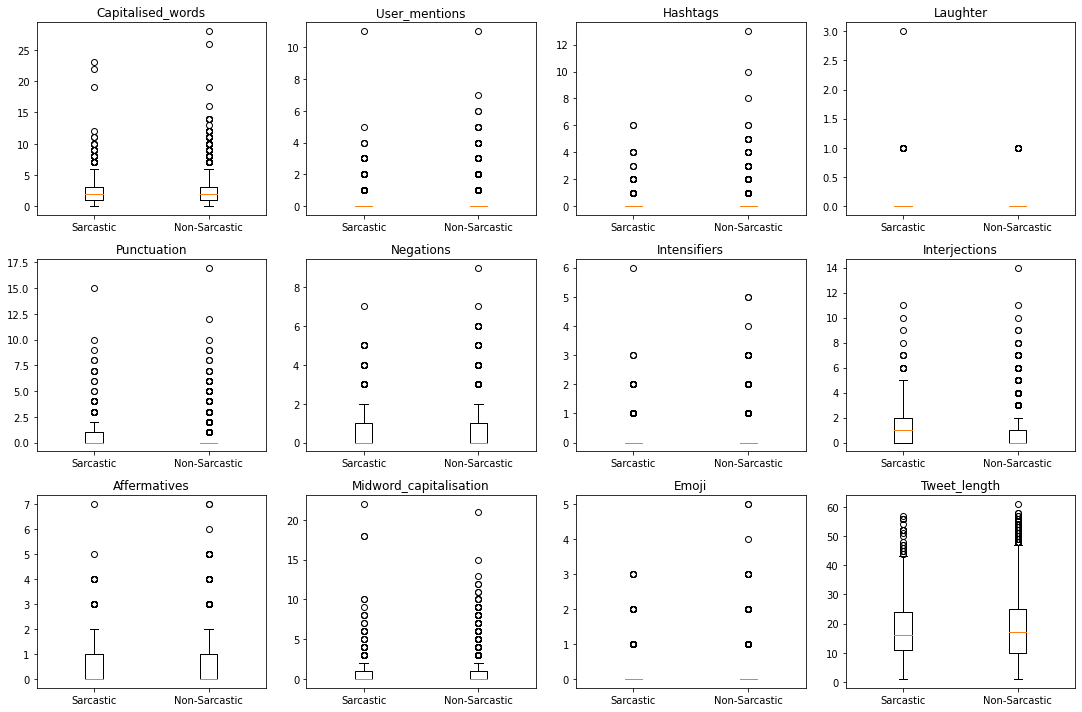

In [69]:
#Try another method to verify that every column contains outliers

#Create subplots to plot box plots
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axs = axs.ravel()

#Iterate through each column and create box plots
for i, column in enumerate(columns):
    axs[i].boxplot([df[df['sarcastic'] == 1][column], df[df['sarcastic'] == 0][column]], labels=['Sarcastic', 'Non-Sarcastic'])
    axs[i].set_title(column.capitalize())

#Adjust layout and show the plots
plt.tight_layout()
plt.show()

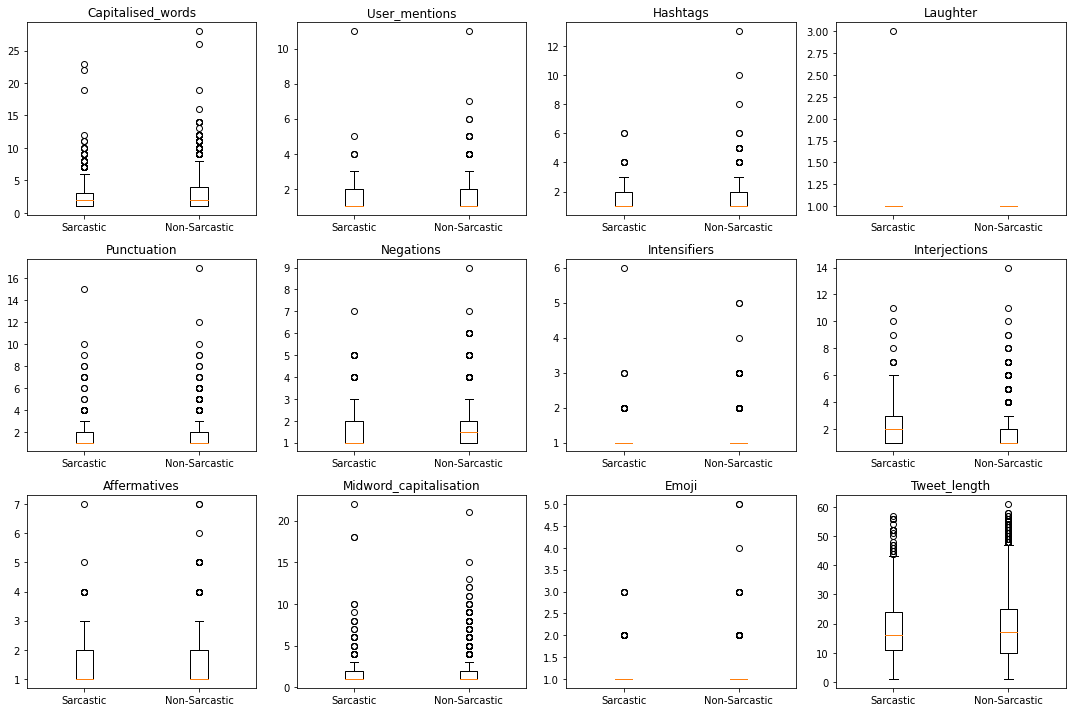

In [70]:
#Issue is arising because most people dont use any so anyone who uses several is an outlier
#Recheck the results where only values >0 are considered

#Create subplots to plot box plots
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axs = axs.ravel()

#Iterate through each column and create box plots
for i, column in enumerate(columns):
    #Filter values greater than 0 for each subset
    sarcastic_values = df[df['sarcastic'] == 1][column][df[df['sarcastic'] == 1][column] > 0]
    nonsarcastic_values = df[df['sarcastic'] == 0][column][df[df['sarcastic'] == 0][column] > 0]
    
    #Plot box plots for each subset
    axs[i].boxplot([sarcastic_values, nonsarcastic_values], labels=['Sarcastic', 'Non-Sarcastic'])
    axs[i].set_title(column.capitalize())

#Adjust layout and show the plots
plt.tight_layout()
plt.show()

Results below highlight 6 pragmatic features that have statistically significant differences in sarcastic and non-sarcastic tweets. They are as follows: frequency of hashtags, laughter markers, punctuation, interjections, mid-sentence capitalisations, emoji.

In [71]:
#Non parametric test should be used in all cases due to the presence of outliers
#Data subsets are classed as independent here- sarcastc and non sarcastic content- Mann-Whitney U Test is appropriate

#Iterate through each column and perform the Mann-Whitney U test
for column in columns:
    sarcastic_data = df[df['sarcastic'] == 1][column]
    nonsarcastic_data = df[df['sarcastic'] == 0][column]
    statistic, p_value = stats.mannwhitneyu(sarcastic_data, nonsarcastic_data, alternative='two-sided')
    print(f"Column: {column}")
    print("Mann-Whitney U statistic:", statistic)
    print("P-value:", p_value)
    if p_value > alpha:
        print("Fail to reject the null hypothesis. There is no significant difference between the distributions.")
    else:
        print("Reject the null hypothesis. There is a significant difference between the distributions.")

Column: capitalised_words
Mann-Whitney U statistic: 1083103.5
P-value: 0.07946333417464102
Fail to reject the null hypothesis. There is no significant difference between the distributions.
Column: user_mentions
Mann-Whitney U statistic: 1157883.5
P-value: 0.056943746806615875
Fail to reject the null hypothesis. There is no significant difference between the distributions.
Column: hashtags
Mann-Whitney U statistic: 1099210.0
P-value: 0.043751356847448
Reject the null hypothesis. There is a significant difference between the distributions.
Column: laughter
Mann-Whitney U statistic: 1143570.0
P-value: 1.573334382458519e-05
Reject the null hypothesis. There is a significant difference between the distributions.
Column: punctuation
Mann-Whitney U statistic: 1186892.0
P-value: 0.0014906282017681438
Reject the null hypothesis. There is a significant difference between the distributions.
Column: negations
Mann-Whitney U statistic: 1135079.5
P-value: 0.7001345614791639
Fail to reject the null h

# Part-of-speech (POS) tags

In [80]:
#Download tagger
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\niamh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\niamh\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [138]:
#Tokenize and POS tag tweets
df['pos_tags'] = df['tweet'].apply(lambda x: pos_tag(word_tokenize(x)))

#Define all NLTK POS tags
all_pos_tags = set(['CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD',
                    'NN', 'NNS', 'NNP', 'NNPS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB',
                    'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN',
                    'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB'])

#Count POS tags
def get_pos_features(pos_tweet):
    pos_dict = dict.fromkeys(all_pos_tags, 0)
    for _, pos in pos_tweet:
        if pos in pos_dict:
            pos_dict[pos] += 1
    #Filter out POS tags with count 0
    pos_dict_filtered = {pos: count for pos, count in pos_dict.items() if count > 0}
    return pos_dict_filtered

#Apply the function
df['pos_count'] = df['pos_tags'].apply(get_pos_features)
df.head()

,tweet,sarcastic,rephrase,capitalised_words,user_mentions,hashtags,laughter,punctuation,negations,intensifiers,...,affermatives,midword_capitalisation,emoji,tweet_length,unigrams,bigrams,trigrams,pos_tags,pos_count,subjectivity
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",2,0,0,0,0,0,0,...,0,0,0,11,"[The, only, thing, I, got, from, college, is, ...","[The only, only thing, thing I, I got, got fro...","[The only thing, only thing I, thing I got, I ...","[(The, DT), (only, JJ), (thing, NN), (I, PRP),...","{'VBZ': 1, 'NN': 3, 'PRP': 1, 'JJ': 2, 'DT': 2...","[(addiction, weaksubj)]"
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,3,0,0,0,0,0,0,...,2,0,0,26,"[I, love, it, when, professors, draw, a, big, ...","[I love, love it, it when, when professors, pr...","[I love it, love it when, it when professors, ...","[(I, PRP), (love, VBP), (it, PRP), (when, WRB)...","{'PRP$': 1, 'WRB': 1, 'NN': 8, 'PRP': 4, 'JJ':...","[(love, strongsubj), (big, weaksubj), (yeah, s..."
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",4,1,0,0,2,0,0,...,1,1,0,36,"[Remember, the, hundred, emails, from, compani...","[Remember the, the hundred, hundred emails, em...","[Remember the hundred, the hundred emails, hun...","[(Remember, VB), (the, DT), (hundred, CD), (em...","{'WRB': 1, 'NN': 3, 'PRP': 2, 'VB': 2, 'JJ': 5...","[(real, weaksubj), (support, weaksubj), (prote..."
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",2,0,0,0,0,2,0,...,0,0,0,17,"[Today, my, pop-pop, told, me, I, was, not, “,...","[Today my, my pop-pop, pop-pop told, told me, ...","[Today my pop-pop, my pop-pop told, pop-pop to...","[(Today, NN), (my, PRP$), (pop-pop, NN), (told...","{'PRP$': 1, 'NN': 5, 'PRP': 2, 'VB': 1, 'JJ': ...","[(okay, strongsubj), (sure, strongsubj)]"
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,5,3,0,0,0,2,1,...,0,1,0,29,"[@, VolphanCarol, @, littlewhitty, @, mystical...","[@ VolphanCarol, VolphanCarol @, @ littlewhitt...","[@ VolphanCarol @, VolphanCarol @ littlewhitty...","[(@, NNS), (VolphanCarol, NNP), (@, NNP), (lit...","{'PRP$': 1, 'WRB': 1, 'NN': 3, 'PRP': 3, 'JJ':...","[(too, weaksubj), (worrying, strongsubj)]"


In [92]:
#Look at distribution of POS tags in tweets

#Create a new df to store the info for legibility purposes
pos_df = pd.DataFrame()

#Iterate through each row in the original df
for index, row in df.iterrows():
    tweet = row['tweet']
    sarcastic = row['sarcastic']
    pos_count = row['pos_count']
    #Create a dictionary to hold the POS tag counts for the tweet
    pos_dict = {'tweet': tweet, 'sarcastic': sarcastic}
    pos_dict.update(pos_count)
    #Append the dictionary as a new row to the POS df
    pos_df = pos_df.append(pos_dict, ignore_index=True)

pos_df.head()

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict, ignore_index=True)
C:\Users\niamh\AppData\Local\Temp\ipykernel_87960\3052573301.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos_df = pos_df.append(pos_dict,

,tweet,sarcastic,SYM,UH,WDT,VBZ,PRP$,WP,WRB,MD,...,VBG,WP$,JJS,RBS,EX,NNP,NNS,PDT,LS,VBD
0,The only thing I got from college is a caffein...,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,I love it when professors draw a big question ...,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,Remember the hundred emails from companies whe...,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,2,6,0,0,3
3,Today my pop-pop told me I was not “forced” to...,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,2
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,6,3,0,0,3


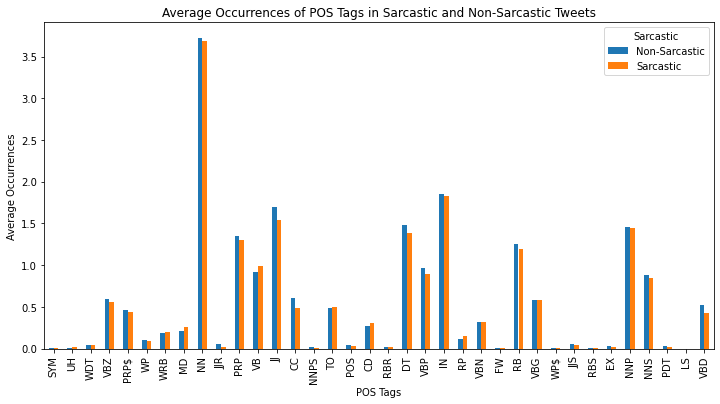

In [94]:
#Calculate the average occurrences of each POS tag in sarcastic and non-sarcastic tweets
pos_means = pos_df.groupby('sarcastic').mean()

#Plot paired bar chart
pos_means.T.plot(kind='bar', rot=90, figsize=(12, 6))
plt.xlabel('POS Tags')
plt.ylabel('Average Occurrences')
plt.title('Average Occurrences of POS Tags in Sarcastic and Non-Sarcastic Tweets')
plt.legend(title='Sarcastic', labels=['Non-Sarcastic', 'Sarcastic'])
plt.show()

In [95]:
#Check if there are statistically significant differences in the frequencies of POS tags for sarcastic/non sarcastic tweets

#First determine if parametric/nonparametric test should be used
#Check if data is normally distributed via Shapiro Wilk test

#Create subsets
sarcastic_tweets_pos = pos_df[pos_df['sarcastic'] == 1]
nonsarcastic_tweets_pos = pos_df[pos_df['sarcastic'] == 0]

#List POS tags
columns = ['CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD',
                    'NN', 'NNS', 'NNP', 'NNPS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB',
                    'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN',
                    'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB']

# Perform the t-test for each column
for column in columns:
    t_stat, p_value = stats.ttest_ind(sarcastic_tweets_pos[column], nonsarcastic_tweets_pos[column], equal_var=False)
    print(f"Column: {column}")
    print("T-statistic:", t_stat)
    print("P-value:", p_value)
    if p_value > alpha:
        print("Fail to reject the null hypothesis. The data is probably normally distributed.")
    else:
        print("Reject the null hypothesis. The data is probably not noramlly distributed.")

Column: CC
T-statistic: -3.7285264551237707
P-value: 0.00019922321970715256
Reject the null hypothesis. The data is probably not noramlly distributed.
Column: CD
T-statistic: 1.2443008692501454
P-value: 0.21359774104653922
Fail to reject the null hypothesis. The data is probably normally distributed.
Column: DT
T-statistic: -1.9952848010928574
P-value: 0.046173063406461635
Reject the null hypothesis. The data is probably not noramlly distributed.
Column: EX
T-statistic: -2.538409911125512
P-value: 0.011204917319787715
Reject the null hypothesis. The data is probably not noramlly distributed.
Column: FW
T-statistic: -2.599744996260091
P-value: 0.00937501964365794
Reject the null hypothesis. The data is probably not noramlly distributed.
Column: IN
T-statistic: -0.48577548469534
P-value: 0.6271912380775146
Fail to reject the null hypothesis. The data is probably normally distributed.
Column: JJ
T-statistic: -2.7146681076234658
P-value: 0.006706295769166849
Reject the null hypothesis. The

In [96]:
#Check for outliers using Z-scores and IQR

#Define the thresholds for potential outliers
z_threshold = 3
iqr_threshold = 1.5

#Iterate through each column
for column in columns:
    data = pos_df[column]
    
    #Calculate Z-scores for potential outliers
    z_scores = np.abs((data - data.mean()) / data.std())
    
    #Identify potential outliers using Z-scores
    z_outliers = data[z_scores > z_threshold]
    
    #Calculate IQR and define lower and upper bounds for potential outliers
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_threshold * IQR
    upper_bound = Q3 + iqr_threshold * IQR
    
    #Identify potential outliers using IQR
    iqr_outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    #Print the results for the current column
    print(f"Column: {column}")
    print("Number of potential outliers using Z-scores:")
    print(len(z_outliers))
    print("Number of potential outliers using IQR:")
    print(len(iqr_outliers))
    print("\n")

Column: CC
Number of potential outliers using Z-scores:
31
Number of potential outliers using IQR:
135


Column: CD
Number of potential outliers using Z-scores:
36
Number of potential outliers using IQR:
745


Column: DT
Number of potential outliers using Z-scores:
58
Number of potential outliers using IQR:
58


Column: EX
Number of potential outliers using Z-scores:
87
Number of potential outliers using IQR:
87


Column: FW
Number of potential outliers using Z-scores:
24
Number of potential outliers using IQR:
24


Column: IN
Number of potential outliers using Z-scores:
36
Number of potential outliers using IQR:
36


Column: JJ
Number of potential outliers using Z-scores:
42
Number of potential outliers using IQR:
412


Column: JJR
Number of potential outliers using Z-scores:
155
Number of potential outliers using IQR:
155


Column: JJS
Number of potential outliers using Z-scores:
184
Number of potential outliers using IQR:
184


Column: LS
Number of potential outliers using Z-scores:

The results of this test finds that there is a statistically significant difference between the frequency that 6 POS tags are used in sarcastic and non sarcastic tweets. They are as follows: Coordinating conjunction, Adjectives, Cooperating adjectives, Modal Auxillary Verbs, Interjections (also found in previous test for pragmatic features), Verb base forms. 

In [97]:
#Non parametric test should be used in all cases due to the presence of outliers
#Data subsets are classed as independent here- sarcastc and non sarcastic content- Mann-Whitney U Test is appropriate

#Iterate through each column and perform the Mann-Whitney U test
for column in columns:
    sarcastic_data = pos_df[pos_df['sarcastic'] == 1][column]
    nonsarcastic_data = pos_df[pos_df['sarcastic'] == 0][column]
    statistic, p_value = stats.mannwhitneyu(sarcastic_data, nonsarcastic_data, alternative='two-sided')
    print(f"Column: {column}")
    print("Mann-Whitney U statistic:", statistic)
    print("P-value:", p_value)
    if p_value > alpha:
        print("Fail to reject the null hypothesis. There is no significant difference between the distributions.")
    else:
        print("Reject the null hypothesis. There is a significant difference between the distributions.")

Column: CC
Mann-Whitney U statistic: 1046589.0
P-value: 0.0003047753007086268
Reject the null hypothesis. There is a significant difference between the distributions.
Column: CD
Mann-Whitney U statistic: 1149366.5
P-value: 0.22242980096609233
Fail to reject the null hypothesis. There is no significant difference between the distributions.
Column: DT
Mann-Whitney U statistic: 1106423.5
P-value: 0.4024275403387211
Fail to reject the null hypothesis. There is no significant difference between the distributions.
Column: EX
Mann-Whitney U statistic: 1113612.5
P-value: 0.051121648411639395
Fail to reject the null hypothesis. There is no significant difference between the distributions.
Column: FW
Mann-Whitney U statistic: 1120162.0
P-value: 0.058400840898283554
Fail to reject the null hypothesis. There is no significant difference between the distributions.
Column: IN
Mann-Whitney U statistic: 1144653.0
P-value: 0.4819450790267856
Fail to reject the null hypothesis. There is no significant d

# N-grams

In [100]:
#Remove columns that are no longer needed
df = df.drop(columns=['pos_tags', 'pos_count'])
df.head()

,tweet,sarcastic,rephrase,capitalised_words,user_mentions,hashtags,laughter,punctuation,negations,intensifiers,interjections,affermatives,midword_capitalisation,emoji,tweet_length
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",2,0,0,0,0,0,0,0,0,0,0,11
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,3,0,0,0,0,0,0,2,2,0,0,26
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",4,1,0,0,2,0,0,0,1,1,0,36
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",2,0,0,0,0,2,0,0,0,0,0,17
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,5,3,0,0,0,2,1,0,0,1,0,29


In [102]:
#Function to extract n grams from tweets
def extract_ngrams(text, n):
    words = nltk.word_tokenize(text)
    ngrams = list(nltk.ngrams(words, n))
    return [' '.join(gram) for gram in ngrams]

#Apply the function to extract unigrams, bigrams, and trigrams
df['unigrams'] = df['tweet'].apply(lambda x: extract_ngrams(x, 1))
df['bigrams'] = df['tweet'].apply(lambda x: extract_ngrams(x, 2))
df['trigrams'] = df['tweet'].apply(lambda x: extract_ngrams(x, 3))

df.head()

,tweet,sarcastic,rephrase,capitalised_words,user_mentions,hashtags,laughter,punctuation,negations,intensifiers,interjections,affermatives,midword_capitalisation,emoji,tweet_length,unigrams,bigrams,trigrams
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",2,0,0,0,0,0,0,0,0,0,0,11,"[The, only, thing, I, got, from, college, is, ...","[The only, only thing, thing I, I got, got fro...","[The only thing, only thing I, thing I got, I ..."
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,3,0,0,0,0,0,0,2,2,0,0,26,"[I, love, it, when, professors, draw, a, big, ...","[I love, love it, it when, when professors, pr...","[I love it, love it when, it when professors, ..."
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",4,1,0,0,2,0,0,0,1,1,0,36,"[Remember, the, hundred, emails, from, compani...","[Remember the, the hundred, hundred emails, em...","[Remember the hundred, the hundred emails, hun..."
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",2,0,0,0,0,2,0,0,0,0,0,17,"[Today, my, pop-pop, told, me, I, was, not, “,...","[Today my, my pop-pop, pop-pop told, told me, ...","[Today my pop-pop, my pop-pop told, pop-pop to..."
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,5,3,0,0,0,2,1,0,0,1,0,29,"[@, VolphanCarol, @, littlewhitty, @, mystical...","[@ VolphanCarol, VolphanCarol @, @ littlewhitt...","[@ VolphanCarol @, VolphanCarol @ littlewhitty..."


# Subjectivity

In [112]:
#Open text file of subjectivity lexicon
with open('subjectivity_lexicon.txt', 'r') as file:
    lexicon_content = file.read()

#Define an expression pto match the lexicon entry pattern
pattern = r'type=(\w+)\s+len=(\d+)\s+word1=(\w+)\s+pos1=(\w+)\s+stemmed1=(\w+)\s+priorpolarity=(\w+)'

#Find all matches in the lexicon
matches = re.findall(pattern, lexicon_content)

#Create a list of dictionaries to store the lexicon data
lexicon_data = []
for match in matches:
    lexicon_data.append({
        'type': match[0],
        'len': int(match[1]),
        'word1': match[2],
        'pos1': match[3],
        'stemmed1': match[4],
        'priorpolarity': match[5]})
    
#Store lexicon in dataframe
subj_lexicon = pd.DataFrame(lexicon_data)
subj_lexicon.head()

,type,len,word1,pos1,stemmed1,priorpolarity
0,weaksubj,1,abandoned,adj,n,negative
1,weaksubj,1,abandonment,noun,n,negative
2,weaksubj,1,abandon,verb,y,negative
3,strongsubj,1,abase,verb,y,negative
4,strongsubj,1,abasement,anypos,y,negative


In [113]:
subj_lexicon.shape

(8021, 6)

In [114]:
subj_lexicon['len'].value_counts()

1    8021
Name: len, dtype: int64

In [115]:
#Remove len as it provides no information
subj_lexicon = subj_lexicon.drop(columns=['len'])
subj_lexicon.head()

,type,word1,pos1,stemmed1,priorpolarity
0,weaksubj,abandoned,adj,n,negative
1,weaksubj,abandonment,noun,n,negative
2,weaksubj,abandon,verb,y,negative
3,strongsubj,abase,verb,y,negative
4,strongsubj,abasement,anypos,y,negative


In [116]:
subj_lexicon['type'].value_counts()

strongsubj    5428
weaksubj      2593
Name: type, dtype: int64

In [118]:
subj_lexicon['pos1'].value_counts()
#Not aligned with the POS tags in the main df

adj       3112
noun      2120
verb      1322
anypos    1137
adverb     330
Name: pos1, dtype: int64

In [119]:
#Create a dictionary to map lexicon POS tags to df POS tags
pos_mapping = {
    'adj': ['JJ', 'JJR', 'JJS'],
    'noun': ['NN', 'NNS', 'NNP', 'NNPS'],
    'verb': ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'],
    'anypos': ['CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD','NN', 'NNS', 'NNP', 'NNPS', 'PDT', 'POS', 
               'PRP', 'PRP$', 'RB','RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP',
               'WP$', 'WRB'],
    'adverb': ['RB', 'RBR', 'RBS', 'WRB']}

In [120]:
subj_lexicon.head()

,type,word1,pos1,stemmed1,priorpolarity
0,weaksubj,abandoned,adj,n,negative
1,weaksubj,abandonment,noun,n,negative
2,weaksubj,abandon,verb,y,negative
3,strongsubj,abase,verb,y,negative
4,strongsubj,abasement,anypos,y,negative


In [122]:
#Create a dictionary to store subjectivity information

#Initialise dictionary
subj_dict = {}

#Iterate through the lexicon to populate dictionary
for index, row in subj_lexicon.iterrows():
    subj_type = row['type']
    word = row['word1']
    pos = row['pos1']
    stemmed = row['stemmed1']
    polarity = row['priorpolarity']
    
    #Use mapping to convert POS tags
    mapped_pos = pos_mapping.get(pos, [pos])
    for p in mapped_pos:
        key = (word, p)
        subj_dict[key] = subj_type
        
    #Define dictionary key using word and POS tag
    key = (word, pos)
    
    #Add the subjectivity type to the dictionary for the corresponding key
    subj_dict[key] = subj_type
    
print(subj_dict)

{('abandoned', 'JJ'): 'weaksubj', ('abandoned', 'JJR'): 'weaksubj', ('abandoned', 'JJS'): 'weaksubj', ('abandoned', 'adj'): 'weaksubj', ('abandonment', 'NN'): 'weaksubj', ('abandonment', 'NNS'): 'weaksubj', ('abandonment', 'NNP'): 'weaksubj', ('abandonment', 'NNPS'): 'weaksubj', ('abandonment', 'noun'): 'weaksubj', ('abandon', 'VB'): 'weaksubj', ('abandon', 'VBD'): 'weaksubj', ('abandon', 'VBG'): 'weaksubj', ('abandon', 'VBN'): 'weaksubj', ('abandon', 'VBP'): 'weaksubj', ('abandon', 'VBZ'): 'weaksubj', ('abandon', 'verb'): 'weaksubj', ('abase', 'VB'): 'strongsubj', ('abase', 'VBD'): 'strongsubj', ('abase', 'VBG'): 'strongsubj', ('abase', 'VBN'): 'strongsubj', ('abase', 'VBP'): 'strongsubj', ('abase', 'VBZ'): 'strongsubj', ('abase', 'verb'): 'strongsubj', ('abasement', 'CC'): 'strongsubj', ('abasement', 'CD'): 'strongsubj', ('abasement', 'DT'): 'strongsubj', ('abasement', 'EX'): 'strongsubj', ('abasement', 'FW'): 'strongsubj', ('abasement', 'IN'): 'strongsubj', ('abasement', 'JJ'): 'str

In [129]:
#Define a function to get subjectivity features for each tweet
def get_subjectivity_weights(pos_tweet, subj_dict):
    pos_dict = []
    for word, pos in pos_tweet:
        subj_type = 'notfound'
        if (word, pos) in subj_dict:
            subj_type = subj_dict[(word, pos)]
        pos_dict.append((word, subj_type))
    return pos_dict

#Apply the function
df['subjectivity'] = df['pos_tags'].apply(lambda x: get_subjectivity_weights(x, subj_dict))

df.head()

,tweet,sarcastic,rephrase,capitalised_words,user_mentions,hashtags,laughter,punctuation,negations,intensifiers,...,affermatives,midword_capitalisation,emoji,tweet_length,unigrams,bigrams,trigrams,pos_tags,pos_count,subjectivity
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",2,0,0,0,0,0,0,...,0,0,0,11,"[The, only, thing, I, got, from, college, is, ...","[The only, only thing, thing I, I got, got fro...","[The only thing, only thing I, thing I got, I ...","[(The, DT), (only, JJ), (thing, NN), (I, PRP),...","{'SYM': 0, 'UH': 0, 'WDT': 0, 'VBZ': 1, 'PRP$'...","[(The, notfound), (only, notfound), (thing, no..."
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,3,0,0,0,0,0,0,...,2,0,0,26,"[I, love, it, when, professors, draw, a, big, ...","[I love, love it, it when, when professors, pr...","[I love it, love it when, it when professors, ...","[(I, PRP), (love, VBP), (it, PRP), (when, WRB)...","{'SYM': 0, 'UH': 0, 'WDT': 0, 'VBZ': 0, 'PRP$'...","[(I, notfound), (love, strongsubj), (it, notfo..."
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",4,1,0,0,2,0,0,...,1,1,0,36,"[Remember, the, hundred, emails, from, compani...","[Remember the, the hundred, hundred emails, em...","[Remember the hundred, the hundred emails, hun...","[(Remember, VB), (the, DT), (hundred, CD), (em...","{'SYM': 0, 'UH': 0, 'WDT': 0, 'VBZ': 0, 'PRP$'...","[(Remember, notfound), (the, notfound), (hundr..."
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",2,0,0,0,0,2,0,...,0,0,0,17,"[Today, my, pop-pop, told, me, I, was, not, “,...","[Today my, my pop-pop, pop-pop told, told me, ...","[Today my pop-pop, my pop-pop told, pop-pop to...","[(Today, NN), (my, PRP$), (pop-pop, NN), (told...","{'SYM': 0, 'UH': 0, 'WDT': 0, 'VBZ': 0, 'PRP$'...","[(Today, notfound), (my, notfound), (pop-pop, ..."
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,5,3,0,0,0,2,1,...,0,1,0,29,"[@, VolphanCarol, @, littlewhitty, @, mystical...","[@ VolphanCarol, VolphanCarol @, @ littlewhitt...","[@ VolphanCarol @, VolphanCarol @ littlewhitty...","[(@, NNS), (VolphanCarol, NNP), (@, NNP), (lit...","{'SYM': 0, 'UH': 0, 'WDT': 0, 'VBZ': 0, 'PRP$'...","[(@, notfound), (VolphanCarol, notfound), (@, ..."


In [136]:
# Define a function to get subjectivity features for each tweet
def get_subjectivity_weights(pos_tweet, subj_dict):
    pos_dict = [(word, subj_dict.get((word, pos), 'notfound')) for word, pos in pos_tweet]
    return [(word, subj_type) for word, subj_type in pos_dict if subj_type != 'notfound']

#Apply the function
df['subjectivity'] = df['pos_tags'].apply(lambda x: get_subjectivity_weights(x, subj_dict))
df.loc[2, 'subjectivity']

[('real', 'weaksubj'),
 ('support', 'weaksubj'),
 ('protests', 'weaksubj'),
 ('helpful', 'weaksubj'),
 ('actually', 'strongsubj'),
 ('black', 'weaksubj'),
 ('love', 'strongsubj')]

In [147]:
#Define a function to get the ratio of weak and strong subjectivity features for each tweet (from 0 to 1)
#Only strong is 1 and only weak is 0
def calculate_subjectivity_ratio(pos_tweet):
    weak_count = sum(1 for _, subj_type in pos_tweet if subj_type == 'weaksubj')
    strong_count = sum(1 for _, subj_type in pos_tweet if subj_type == 'strongsubj')
    total_count = weak_count + strong_count
    #Avoid division by zero
    if total_count == 0:
        return 0
    return strong_count / total_count

#Apply the function
df['subjectivity_ratio'] = df['subjectivity'].apply(calculate_subjectivity_ratio)
df.loc[2, 'subjectivity_ratio']

0.2857142857142857

# Topic Modelling

In [332]:
#Importing libraries
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from nltk.corpus import stopwords
from spellchecker import SpellChecker

In [338]:
#Copy tweets from original column for processing for this task+lowercase
df['tweets_copy'] = df['tweet']

def remove_mentions(text):
    pattern = r'@\w+\s?'
    cleaned_text = re.sub(pattern, '', text)
    cleaned_text = cleaned_text.lower()
    return cleaned_text
#Apply the function
df['tweets_copy'] = df['tweets_copy'].apply(remove_mentions)

In [339]:
#Remove urls from tweets
def remove_urls(text):
    text_without_urls = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    return text_without_urls
#Apply the function
df['tweets_copy'] = df['tweets_copy'].apply(remove_urls)

In [ ]:
#Spellcheck words
def correct_spelling(text):
    spell = SpellChecker()
    words = text.split()
    misspelled = spell.unknown(words)
    corrected_words = [spell.correction(word) if word in misspelled else word for word in words]
    corrected_words = [word for word in corrected_words if word is not None]
    corrected_text = " ".join(corrected_words)
    return corrected_text
#Apply the function
df['tweets_copy'] = df['tweets_copy'].apply(correct_spelling)

In [ ]:
#Replace contractions

#Dictionary for mapping
contractions = {"ain't": "is not", "aren't": "are not", "can't": "cannot", "ve": "have", "cause": "because",
                "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not",
                "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not",
                "haven't": "have not", "ll": "will", "n": "and", "s": "is", "d": "would", "m": "am", "isn't": "is not",
                "it'd": "it would", "it'd've": "it would have", "let's": "let us", "all's": "all", "ma'am": "madam",
                "b'day": "birthday", "might've": "might have", "must've": "must have", "mustn't": "must not",
                "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock",
                "oughtn't": "ought not", "oughtn't've": "ought not have", "she'll": "she will", "she'd": "she would",
                "he'd": "he would", "i'd": "I would", "i'm": "I am", "shan't": "shall not", "sha'n't": "shall not",
                "shan't've": "shall not have", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
                "that'd": "that would",  "that's": "that is","there'd": "there would", "there'd've": "there would have",
                "there's": "there is", "to've": "to have", "wasn't": "was not", "re": "are", "weren't": "were not",
                "what'll": " what will", "what'll've": "what will have", "what're": "what are", "they're": "they are",
                "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did",
                "where's": "where is", "where've": "where have", "who'll": " who will", "who'll've": "who will have",
                "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have",
                "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not",
                "wouldn't've": "would not have", "y'all": "you all", "y'll": "you all", "ya'll": "you all",
                "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are",
                "y'all've": "you all have", "c'mon": "come on", "ma": "am going to"}

#Define function to replace contractions with the full expression 
def replace_contractions(text):
    words = text.split()
    # Replacing contracted words with their full expressions
    expanded_words = [contractions[word] if word in contractions else word for word in words]
    expanded_text = " ".join(expanded_words)
    return expanded_text
#Apply the function
df['tweets_copy'] = df['tweets_copy'].apply(replace_contractions)

In [ ]:
#Convert slag to normal words

#Dictionary for mapping
slang = {"4ward": "forward", "brb": "be right back", "b4": "before", "bfn": "bye for now", "bgd": "background",
         "btw": "by the way", "br": "best regards", "clk": "click", "da": "the", "deet": "detail", "deets": "details",
         "dm": "direct message", "f2f": "face to face", "ftl": " for the loss", "ftw": "for the win", "kk" : "cool cool",
         "kewl": "cool", "rt": "retweet", "smh": "so much hate", "yaass": "yes", "a$$":"ass", "bby": "baby", "bc": "because",
         "coz": "because","cuz": "because", "cause": "because", "cmon": "come on", "cmonn": "come on", "dafuq": "what the fuck",
         "dafuk": "what the fuck", "dis": "this", "diss": "this", "ma": "my", "dono": "do not know", "donno": "do not know",
         "dunno": "do not know", "fb": "facebook", "couldnt": "could not", "n": "and", "gtg": "got to go", "yep": "yes",
         "yw": "you are welcome", "im": "i am", "youre":"you are", "hes": "he is", "shes": "she is", "theyre": "they are", 
         "af": "as fuck", "fam": "family", "fwd": "forward", "ffs": "for fuck sake", "fml": "fuck my life",
         "lol": "laugh out loud", "lel": "laugh out loud", "lool": "laugh out loud", "lmao": "laugh my ass off",
         "lmaoo": "laugh my ass off", "omg":"oh my god", "oomg":"oh my god", "omgg":"oh my god", "omfg": "oh my fucking god", 
         "stfu": "shut the fuck up", "awsome":"awesome", "imo": "in my opinion", "imho": "in my humble opinion",
         "ily": "i love you", "ilyy": "i love you", "ikr": "i know right", "ikrr": "i know right", "idk": "i do not know",
         "jk": "joking", "lmk": "let me know", "nsfw": "not safe for work" "hehe": "haha", "tmrw": "tomorrow", "yt": "youtube",
         "hahaha": "haha", "hihi": "haha", "pls": "please", "ppl": "people", "wtf": "what the fuck", "wth": "what teh hell",
         "obv": "obviously", "nomore": "no more", "u": "you", "ur": "your", "wanna": "want to", "luv": "love", "imma": "i am",
         "&": "and", "thanx": "thanks", "til": "until", "till": "until", "thx": "thanks", "pic": "picture", "pics": "pictures",
         "gp": "doctor", "xmas": "christmas", "rlly": "really", "boi": "boy", "boii": "boy", "rly": "really", "whch": "which",
         "awee": "awesone",  "sux" : "sucks", "nd": "and", "fav": "favourite", "frnds": "friends", "info": "information", 
         "loml": "love of my life", "bffl": "best friend for life", "gg": "goog game", "xx": "love", "xoxo": "love", 
         "thats": "that is", "homie": "best friend", "homies": "best friends"}

#Define function to replace slang
def replace_slang(text):
    words = text.split()
    expanded_words = [slang[word] if word in slang else word for word in words]
    expanded_text = " ".join(expanded_words)
    return expanded_text
#Apply the function
df['tweets_copy'] = df['tweets_copy'].apply(replace_slang)

In [ ]:
#Remove punctuation from tweets
def remove_punctuation(text):
    cleaned_text = cleaned_text = re.sub(r'[^a-zA-Z\s.]', '', text)
    return cleaned_text
#Apply the function
df['tweets_copy'] = df['tweets_copy'].apply(remove_punctuation)

In [ ]:
#Tokenize tweets
df['tweets_copy'] = [simple_preprocess(tweet) for tweet in df['tweets_copy']]

In [ ]:
#Remove stopwords

#Get English stopwords from nltk
nltk_stopwords = set(stopwords.words('english'))

#Define function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in nltk_stopwords]

#Apply the function
df['tweets_copy'] = df['tweets_copy'].apply(remove_stopwords)

df.loc[0, 'tweets_copy']

In [ ]:
#Build the bigram and trigram models
bigram = gensim.models.Phrases(df['tweets_copy'], min_count=1, threshold=5)
bigram_mod = gensim.models.phrases.Phraser(bigram)

trigram = gensim.models.Phrases(bigram[df['tweets_copy']], threshold=100)  
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
#Make bigrams
tokenized_tweets = df['tweets_copy'].tolist()
tweets_bigrams = [bigram_mod[tweet] for tweet in tokenized_tweets]
df['tweets_copy'] = [' '.join(tweet) for tweet in tweets_bigrams]
df.loc[6, 'tweets_copy']

In [ ]:
#Check if tweets are tokenized
is_tokenized = df['tweets_copy'].apply(lambda x: isinstance(x, list)).all()
print(is_tokenized)

In [ ]:
#Tokenize the tweets
df['tweets_copy'] = df['tweets_copy'].apply(nltk.word_tokenize)

#Check if tweets are tokenized
is_tokenized = df['tweets_copy'].apply(lambda x: isinstance(x, list)).all()
print(is_tokenized)

In [ ]:
#Look at tokenization
df.loc[6, 'tweets_copy']

In [ ]:
# Download WordNet Database
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define function to get WordNet POS tag for better lemmatization
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Define function to perform lemmatization
def lemmatization(tokens_list):
    lemmatized_tweets = []
    for tweet in tokens_list:
        pos_tags = nltk.pos_tag(tweet)
        lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(tag)) for token, tag in pos_tags]
        lemmatized_tweets.append(lemmatized_tokens)
    return lemmatized_tweets

# Apply functions
df['tweets_copy'] = lemmatization(df['tweets_copy'])

# Print a sample of the lemmatized tokens
print(df.loc[0, 'tweets_copy'])

In [ ]:
#Create a dictionary and corpus for topic modelling

#Create dictionary
id2word = corpora.Dictionary(df['tweets_copy'])

#Create corpus
texts = df['tweets_copy']

#Term document frequency
corpus = [id2word.doc2bow(text) for text in texts]

#Ckeck
print(corpus)

In [ ]:
#Check one of the words
id2word[0]

In [ ]:
#Check the term frequencies for the furst tweet
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [ ]:
#Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=5,
                                           update_every=1,
                                           chunksize=200,
                                           passes=20,
                                           alpha=0.01,
                                           per_word_topics=True)

In [ ]:
#Print the keywords for the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]